# Predicting Loan Approval based on 2021 Loan Application Data from the Federal Financial Institutions Examination Council

Anyone who is looking to generate personal wealth may turn to real estate investing. Real estate investing is a strong investment strategy because it provides you an asset that histroically always appreciates in value. One barrier to entering real estate investing is the high costs to purchase a property, these feel especailly high for new graduates out of college as they start their career wiht little  to no savings. This means that usally a loan (mortgage) is required to purchase real estate. As a result, using loan data to predict whether or not an individual will be approved for a loan or not can be valuable for any individuals. Especailly those between 20-30 who want to start investing in real estate, but are unsure whether they would be approved for a loan. This preditive model answers the question "Will an individual be approved for a loan?"

### For more context behind data such as the schema, column headers etc. See Below:
    https://ffiec.cfpb.gov/documentation/2021/modified-lar-schema/ 
    https://ffiec.cfpb.gov/documentation/2021/modified-lar-header/ 

    https://github.com/cfpb/hmda-platform/blob/master/docs/spec/markdown/       modified_lar/2021_Modified_LAR_Data_Dictionary.md 
    https://ffiec.cfpb.gov/data-publication/documents#modified-lar 

###  Importing Libraries and Data

In [4]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# increasing column width
pd.set_option('display.max_columns', None)

In [6]:
# reading in the data
df = pd.read_csv('2021lar.csv', nrows=1000000)

/var/folders/y9/q82qsl6x2n9gqqmjjm5_8m1w0000gn/T/ipykernel_5108/292357558.py:2: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('2021lar.csv', nrows=1000000)


In [7]:
# look at head
df.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,derived_race,derived_sex,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,lien_status,reverse_mortgage,open_end_line_of_credit,business_or_commercial_purpose,loan_amount,combined_loan_to_value_ratio,interest_rate,rate_spread,hoepa_status,total_loan_costs,total_points_and_fees,origination_charges,discount_points,lender_credits,loan_term,prepayment_penalty_term,intro_rate_period,negative_amortization,interest_only_payment,balloon_payment,other_nonamortizing_features,property_value,construction_method,occupancy_type,manufactured_home_secured_property_type,manufactured_home_land_property_interest,total_units,multifamily_affordable_units,income,debt_to_income_ratio,applicant_credit_score_type,co_applicant_credit_score_type,applicant_ethnicity_1,applicant_ethnicity_2,applicant_ethnicity_3,applicant_ethnicity_4,applicant_ethnicity_5,co_applicant_ethnicity_1,co_applicant_ethnicity_2,co_applicant_ethnicity_3,co_applicant_ethnicity_4,co_applicant_ethnicity_5,applicant_ethnicity_observed,co_applicant_ethnicity_observed,applicant_race_1,applicant_race_2,applicant_race_3,applicant_race_4,applicant_race_5,co_applicant_race_1,co_applicant_race_2,co_applicant_race_3,co_applicant_race_4,co_applicant_race_5,applicant_race_observed,co_applicant_race_observed,applicant_sex,co_applicant_sex,applicant_sex_observed,co_applicant_sex_observed,applicant_age,co_applicant_age,applicant_age_above_62,co_applicant_age_above_62,submission_of_application,initially_payable_to_institution,aus_1,aus_2,aus_3,aus_4,aus_5,denial_reason_1,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602901e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,2,0,1,1,1,1,2,2,2,425000,51.829,3.0,0.191,3,NaN,NaN,NaN,NaN,NaN,360,NaN,NaN,2,2,2,2,825000,1,1,3,5,1,NaN,159.0,46,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,35-44,9999,No,NaN,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,5455,2.51,78900,152.0,1943,2018,31
1,2021,5493006LH4LKHY2EIN26,40380,NY,36051.0,3.605103e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,8,2,1,1,1,2,2,2,95000,95.0,2.875,0.086,2,2817.0,NaN,800.0,NaN,NaN,360,NaN,NaN,2,2,2,2,105000,1,1,3,5,1,NaN,35.0,39,2,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,55-64,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,3763,2.02,82900,86.0,1225,1704,67
2,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,8,2,1,1,1,2,2,2,95000,96.999,3.125,0.253,2,2847.0,NaN,800.0,NaN,0.04,360,NaN,NaN,2,2,2,2,95000,1,1,3,5,2,NaN,24.0,38,3,10,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,<25,9999,No,NaN,1,1,6,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,1665,40.00,78900,46.0,312,837,76
3,2021,5493006LH4LKHY2EIN26,15380,NY,36029.0,3.602900e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,4,0,2,1,31,1,2,2,1,125000,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,180,NaN,NaN,2,2,2,2,NaN,1,3,3,5,1,NaN,141.0,NaN,9,9,2.0,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,2,4,5.0,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,2,4,1,5,2,4,65-74,9999,Yes,NaN,1,1,2,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,4212,18.04,78900,137.0,1097,1744,76
4,2021,5493006LH4LKHY2EIN26,21300,NY,36015.0,3.601501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,White,Male,1,3,2,1,1,1,2,2,2,105000,90.0,3.125,0.213,2,3196.6

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 99 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   activity_year                             1000000 non-null  int64  
 1   lei                                       1000000 non-null  object 
 2   derived_msa_md                            1000000 non-null  int64  
 3   state_code                                991619 non-null   object 
 4   county_code                               986261 non-null   float64
 5   census_tract                              984787 non-null   float64
 6   conforming_loan_limit                     993236 non-null   object 
 7   derived_loan_product_type                 1000000 non-null  object 
 8   derived_dwelling_category                 1000000 non-null  object 
 9   derived_ethnicity                         1000000 non-null  object 
 10  derived

In [9]:
# look at shape
df.shape

(1000000, 99)

## Exploratory Data Analysis

In [10]:
# getting desired model features and label
df1 = df[
    ['action_taken',
     'loan_amount',
     'loan_type',
     'loan_purpose',
     'loan_term',
     'preapproval',
     'income',
     'debt_to_income_ratio',
     'applicant_age',
     'occupancy_type',
     'purchaser_type',
     'open_end_line_of_credit'
      ]]

In [11]:
# look at shape
df1.shape

(1000000, 12)

In [12]:
# look at different columns
df1.columns

Index(['action_taken', 'loan_amount', 'loan_type', 'loan_purpose', 'loan_term',
       'preapproval', 'income', 'debt_to_income_ratio', 'applicant_age',
       'occupancy_type', 'purchaser_type', 'open_end_line_of_credit'],
      dtype='object')

In [13]:
# look at actions taken on loan applications
df1['action_taken'].value_counts()

1    626042
4    127856
3     91914
6     73777
5     57636
2     14967
8      4422
7      3386
Name: action_taken, dtype: int64

<AxesSubplot:>

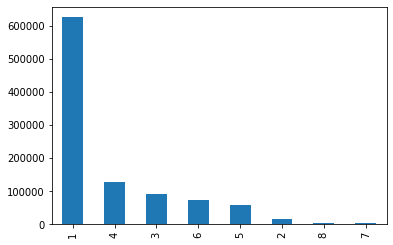

In [14]:
# visualizing actions taken
df1['action_taken'].value_counts().plot(kind = 'bar')

Descriptions:
1. Loan originated
2. Application approved but not accepted
3. Application denied
4. Application withdrawn by applicant
5. File closed for incompleteness
6. Purchased loan
7. Preapproval request denied
8. Preapproval request approved but not accepted

In [15]:
# creating approval columnn, rows take value 1 if approved 0 if denied
df1['Approval'] = np.NaN
df1.loc[df1['action_taken'] == 1.0, 'Approval'] = 1
df1.loc[df1['action_taken'] == 2.0, 'Approval'] = 1
df1.loc[df1['action_taken'] == 3.0, 'Approval'] = 0

/var/folders/y9/q82qsl6x2n9gqqmjjm5_8m1w0000gn/T/ipykernel_5108/1632047288.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Approval'] = np.NaN


In [16]:
#drop action taken column
df1 = df1.drop(columns=['action_taken'])
df1.head()

,loan_amount,loan_type,loan_purpose,loan_term,preapproval,income,debt_to_income_ratio,applicant_age,occupancy_type,purchaser_type,open_end_line_of_credit,Approval
0,425000,1,1,360,1,159.0,46,35-44,1,0,2,1.0
1,95000,1,1,360,2,35.0,39,55-64,1,8,2,1.0
2,95000,1,1,360,2,24.0,38,<25,1,8,2,1.0
3,125000,1,31,180,2,141.0,NaN,65-74,3,0,2,NaN
4,105000,1,1,360,2,80.0,<20%,45-54,1,3,2,1.0


In [17]:
# look at loan types
df1['loan_type'].value_counts()

1    822782
3     85097
2     83610
4      8511
Name: loan_type, dtype: int64

<AxesSubplot:>

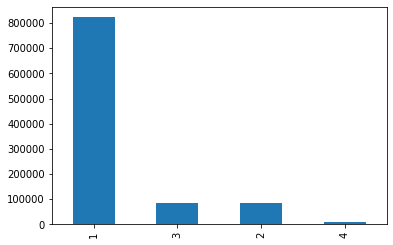

In [18]:
# visualizing loan types
df1['loan_type'].value_counts().plot(kind= 'bar')

Descriptions:
1. Conventional (not insured or guaranteed by FHA VA RHS or FSA)
2. Federal Housing Administration insured (FHA)
3. Veterans Affairs guaranteed (VA)
4. USDA Rural Housing Service or the Farm Service Agency guaranteed (RHS or FSA)

In [19]:
# looking at applicant age
df1['applicant_age'].value_counts()

35-44    235661
45-54    202938
25-34    165963
55-64    157474
65-74     93178
8888      87604
>74       36527
<25       20652
9999          3
Name: applicant_age, dtype: int64

<AxesSubplot:>

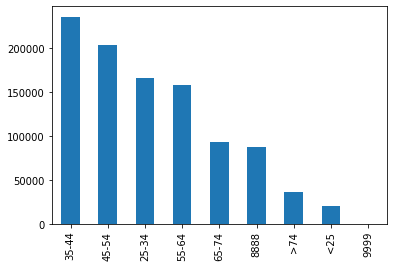

In [20]:
# visualizing applicant age
df1['applicant_age'].value_counts().plot(kind= 'bar')

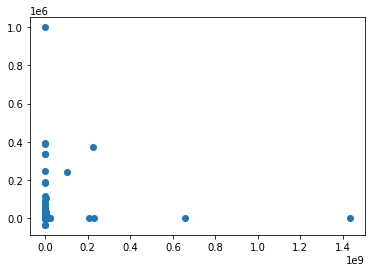

In [21]:
# compare loan amounts and income
plt.scatter(x = 'loan_amount', y= 'income', data=df1)

In [22]:
# get some basic statistics
df1.describe()

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval
count,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,872799.000000,1000000.000000,1000000.000000,1000000.000000,732923.000000
mean,3.291510e+05,1.279337,19.172429,1.985721,128.427079,1.187713,8.060288,45.619106,0.874593
std,1.913855e+06,0.650053,14.781533,0.118639,1505.921957,0.560467,20.601767,215.697156,0.331181
min,5.000000e+03,1.000000,1.000000,1.000000,-35863.000000,1.000000,0.000000,1.000000,0.000000
25%,1.650000e+05,1.000000,1.000000,2.000000,61.000000,1.000000,0.000000,2.000000,1.000000
50%,2.650000e+05,1.000000,31.000000,2.000000,95.000000,1.000000,1.000000,2.000000,1.000000
75%,3.850000e+05,1.000000,31.000000,2.000000,145.000000,1.000000,3.000000,2.000000,1.000000
max,1.432005e+09,4.000000,32.000000,2.000000,1000000.000000,3.000000,72.000000,1111.000000,1.000000


In [23]:
# see correlation between various features 
df1.corr()

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval
loan_amount,1.000000,-0.002722,0.005233,0.003105,0.051255,0.046872,-0.002315,-0.005065,0.022719
loan_type,-0.002722,1.000000,0.000189,-0.015772,-0.014696,-0.122424,0.161738,-0.078215,-0.056048
loan_purpose,0.005233,0.000189,1.000000,0.147967,-0.000386,-0.019033,-0.024613,-0.048981,0.006545
preapproval,0.003105,-0.015772,0.147967,1.000000,0.002286,0.013962,-0.037856,-0.001490,-0.035739
income,0.051255,-0.014696,-0.000386,0.002286,1.000000,0.022529,-0.003147,0.001522,0.003362
occupancy_type,0.046872,-0.122424,-0.019033,0.013962,0.022529,1.000000,-0.000330,0.093747,0.023599
purchaser_type,-0.002315,0.161738,-0.024613,-0.037856,-0.003147,-0.000330,1.000000,-0.062441,0.173917
open_end_line_of_credit,-0.005065,-0.078215,-0.048981,-0.001490,0.001522,0.093747,-0.062441,1.000000,0.008601
Approval,0.022719,-0.056048,0.006545,-0.035739,0.003362,0.023599,0.173917,0.008601,1.000000


<AxesSubplot:>

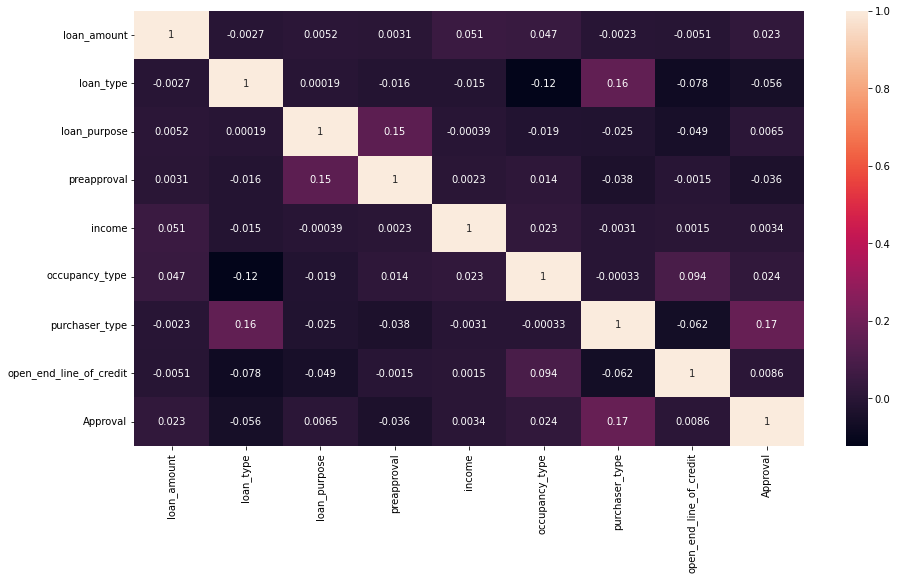

In [24]:
# looking for colinearity
plt.figure(figsize=(15,8))
sns.heatmap(
    data = df1.corr(),
    annot=True,
)

In [25]:
# looking at basic info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 12 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   loan_amount              1000000 non-null  int64  
 1   loan_type                1000000 non-null  int64  
 2   loan_purpose             1000000 non-null  int64  
 3   loan_term                993373 non-null   object 
 4   preapproval              1000000 non-null  int64  
 5   income                   872799 non-null   float64
 6   debt_to_income_ratio     691991 non-null   object 
 7   applicant_age            1000000 non-null  object 
 8   occupancy_type           1000000 non-null  int64  
 9   purchaser_type           1000000 non-null  int64  
 10  open_end_line_of_credit  1000000 non-null  int64  
 11  Approval                 732923 non-null   float64
dtypes: float64(2), int64(7), object(3)
memory usage: 91.6+ MB


In [26]:
# highlighing data types
df1.dtypes

loan_amount                  int64
loan_type                    int64
loan_purpose                 int64
loan_term                   object
preapproval                  int64
income                     float64
debt_to_income_ratio        object
applicant_age               object
occupancy_type               int64
purchaser_type               int64
open_end_line_of_credit      int64
Approval                   float64
dtype: object

In [27]:
df['loan_term'].value_counts()

360.0     403257
360       289451
180.0      62875
180        54829
Exempt     39279
           ...  
327            1
142            1
226            1
383            1
380            1
Name: loan_term, Length: 499, dtype: int64

Descriptions:
1. Loan originated
2. Application approved but not accepted
3. Application denied
4. Application withdrawn by applicant
5. File closed for incompleteness
6. Purchased loan
7. Preapproval request denied
8. Preapproval request approved but not accepted

In [28]:
df.loc[ df["loan_term"] == "Exempt", "loan_term"] = 0.0

In [29]:
df['loan_term'].value_counts()

360.0    403257
360      289451
180.0     62875
180       54829
0.0       39279
          ...  
327           1
142           1
226           1
383           1
380           1
Name: loan_term, Length: 499, dtype: int64

In [30]:
# converting debt_to_income_ratio and applicant_age from objects to ints for mdoel via dummy transformation
age_dummy = pd.get_dummies(df1['applicant_age'])
dir_dummy = pd.get_dummies(df1['debt_to_income_ratio'])

In [31]:
# age dummy transformation
age_dummy.head()

,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74
0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0


In [32]:
# debt to income ratio dummy transformation
dir_dummy.head()

,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
# placing dummies back into dataframe
df1 = pd.concat([df1, age_dummy, dir_dummy], axis=1)

In [34]:
# removing oringinal columns with string values
df1 = df1.drop(columns=['debt_to_income_ratio', 'applicant_age', 'loan_term'])

In [35]:
# looking at head
df1.head()

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,425000,1,1,1,159.0,1,0,2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,95000,1,1,2,35.0,1,8,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95000,1,1,2,24.0,1,8,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,125000,1,31,2,141.0,3,0,2,NaN,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,105000,1,1,2,80.0,1,3,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [36]:
# dropping null values
df1 = df1.dropna()

In [37]:
df1

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,425000,1,1,1,159.0,1,0,2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,95000,1,1,2,35.0,1,8,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95000,1,1,2,24.0,1,8,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,105000,1,1,2,80.0,1,3,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,115000,1,2,2,67.0,1,8,2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,225000,1,31,2,60.0,3,0,2,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999995,325000,1,31,2,128.0,1,0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
999996,435000,1,31,2,315.0,1,0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
999997,195000,1,31,2,0.0,1,0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Model Development



#### Model will predict whether an individual will be approved for a loan or not
#### Label:
    'Approval'
#### Model will have features the following features:, with some being converted to dummy variables (categorical turned into numerical) 
#### Features:
     'loan_amount',
     'loan_type',
     'loan_purpose',
     'loan_term',
     'preapproval',
     'income',
     'debt_to_income_ratio',
     'applicant_age',
     'occupancy_type',
     'purchaser_type',
     'open_end_line_of_credit'
      

In [38]:
first_model = df1.copy()

In [39]:
# splitting the label 
label = first_model.pop('Approval')
label = pd.DataFrame(label)
label

,Approval
0,1.0
1,1.0
2,1.0
4,1.0
6,1.0
...,...
999994,0.0
999995,0.0
999996,0.0
999997,0.0


In [40]:
# remaining columns are features
features = first_model
features

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,425000,1,1,1,159.0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,95000,1,1,2,35.0,1,8,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95000,1,1,2,24.0,1,8,2,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,105000,1,1,2,80.0,1,3,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,115000,1,2,2,67.0,1,8,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999994,225000,1,31,2,60.0,3,0,2,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
999995,325000,1,31,2,128.0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
999996,435000,1,31,2,315.0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
999997,195000,1,31,2,0.0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# importing ML object and functions
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

In [42]:
# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=40, test_size=0.2)

In [43]:
X_train.shape

(550072, 37)

In [44]:
y_train.shape

(550072, 1)

In [45]:
X_test.shape

(137518, 37)

In [46]:
y_test.shape

(137518, 1)

In [47]:
# creating knn object
knn_v1= KNeighborsClassifier()

In [48]:
# training the knn model
knn_v1.fit(X_train, y_train)

/Users/Ishan/Library/Python/3.10/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [49]:
# developing predictions
y_pred = knn_v1.predict(X_test)

In [50]:
# evaluating using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[  5577,  10858],
       [  3793, 117290]])

<AxesSubplot:>

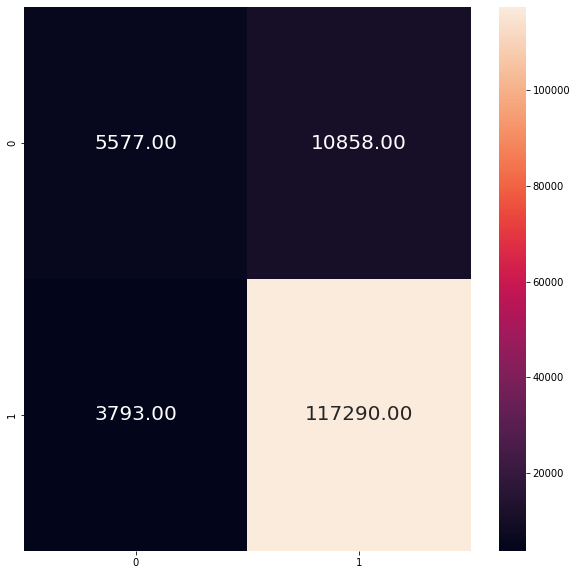

In [51]:
plt.figure(figsize=(10,10))
sns.heatmap(
    data=cm,
    annot= True,
    fmt = '.2f',
    annot_kws= {"fontsize" : 20}
)

In [52]:
# evaluating using accuracy store
accuracy_score(y_test, y_pred)

0.8934612196221585

In [53]:
# evaluating using f1 score
f1_score(y_test, y_pred, pos_label=1)

0.941215177887181

In [54]:
# evaluating using classiication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.60      0.34      0.43     16435
         1.0       0.92      0.97      0.94    121083

    accuracy                           0.89    137518
   macro avg       0.76      0.65      0.69    137518
weighted avg       0.88      0.89      0.88    137518



# Adjusting the Training Data

#### This first model has high accuracy but that is due to the disproportionate data since class 0 has disproportionately less observations than class 1. The model model yields a "high" accuracy by predicting more of class 1 due to the disproportionate data as opposed to using the model features. Hence, undersampling may be an effective way to mitigate this issue by reducing the number of observations of class 1. 

In [55]:
# creating approved and reject dataframes
df1_approved = df1[df1['Approval'] == 1].reset_index(drop=True)
df1_rejected = df1[df1['Approval'] == 0].reset_index(drop=True)

In [56]:
# looking at approved counts
df1_approved['Approval'].count()

604629

In [57]:
# looking at rejected counts
df1_rejected['Approval'].count()

82961

In [58]:
df1_approved

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,425000,1,1,1,159.0,1,0,2,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,95000,1,1,2,35.0,1,8,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,95000,1,1,2,24.0,1,8,2,1.0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,105000,1,1,2,80.0,1,3,2,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,115000,1,2,2,67.0,1,8,2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604624,775000,1,31,2,56.0,3,0,2,1.0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
604625,315000,1,1,2,59.0,1,0,2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
604626,235000,1,31,2,130.0,1,0,2,1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
604627,345000,3,32,2,45.0,1,0,2,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [59]:
df1_rejected

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,145000,1,1,2,30.0,1,0,2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,25000,1,31,2,14.0,1,0,2,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,185000,2,1,2,83.0,1,0,2,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,35000,1,32,2,86.0,1,0,2,0.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,125000,1,32,2,40.0,1,0,2,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82956,225000,1,31,2,60.0,3,0,2,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82957,325000,1,31,2,128.0,1,0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
82958,435000,1,31,2,315.0,1,0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
82959,195000,1,31,2,0.0,1,0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Applying Undersampling Method

In [60]:
from sklearn.utils import resample

In [61]:
# making the sample size equivalent to size of underperesented class (class 0)
sample_size = len(df1_rejected)

In [62]:
# take the random sample
approved_sample = resample(df1_approved, replace=False, n_samples=sample_size)
rejected_sample = resample(df1_rejected, replace=False, n_samples=sample_size)

In [63]:
approved_sample

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
561722,105000,1,31,2,152.0,1,0,1,1.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
76600,335000,2,1,2,68.0,1,0,2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
136264,425000,1,31,2,175.0,1,72,2,1.0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
541643,265000,1,32,2,170.0,1,0,2,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
124119,245000,3,1,2,104.0,1,2,2,1.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482881,335000,3,1,2,66.0,1,0,2,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
63169,335000,1,31,2,64.0,1,0,2,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
354521,95000,1,31,2,126.0,1,8,2,1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
201157,285000,1,32,2,60.0,1,0,2,1.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [64]:
rejected_sample

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,Approval,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
24140,55000,1,4,2,98.0,1,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39310,65000,1,32,2,36.0,1,0,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
865,35000,1,2,2,90.0,1,0,1,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
23252,65000,1,1,2,29.0,1,0,2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
36411,235000,3,1,2,0.0,1,0,2,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49163,75000,1,31,2,73.0,1,0,2,0.0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
57350,615000,1,31,2,66.0,1,0,2,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
79803,235000,3,32,2,70.0,1,0,2,0.0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5600,25000,1,2,2,196.0,2,0,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [65]:
# combining both samples to 1 datframe
random_sample = pd.concat([approved_sample, rejected_sample]).reset_index(drop = True)

In [66]:
# combining both samples to 1 datframe
random_sample = pd.concat([approved_sample, rejected_sample]).reset_index(drop = True)

In [67]:
# creating a copy to split to features and labels
sample = random_sample.copy()

In [68]:
# splitting the label 
label = sample.pop('Approval')
label = pd.DataFrame(label)
label

,Approval
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
165917,0.0
165918,0.0
165919,0.0
165920,0.0


In [69]:
# remaining columns are features
features = sample
features

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,105000,1,31,2,152.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,335000,2,1,2,68.0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,425000,1,31,2,175.0,1,72,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,265000,1,32,2,170.0,1,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,245000,3,1,2,104.0,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165917,75000,1,31,2,73.0,1,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165918,615000,1,31,2,66.0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
165919,235000,3,32,2,70.0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165920,25000,1,2,2,196.0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [70]:
# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=40, test_size=0.2)

In [71]:
y_test

,Approval
53246,1.0
58029,1.0
47494,1.0
89172,0.0
110366,0.0
...,...
49101,1.0
56332,1.0
30838,1.0
126518,0.0


In [72]:
X_test

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
53246,1045000,1,1,2,250.0,1,6,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58029,105000,1,31,2,36.0,1,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
47494,475000,1,32,2,334.0,1,1,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
89172,175000,2,31,2,21.0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
110366,435000,3,31,2,89.0,1,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49101,545000,1,1,2,115.0,1,71,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
56332,335000,1,1,2,184.0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
30838,145000,1,31,2,56.0,1,3,2,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
126518,355000,2,4,2,45.0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#### Showing how first model was not a great model despite high accuracy, poor recall on class 0 and poor precision on class 1 by using knn_v1 model on a balanced dataset

In [73]:
# Proving inaccuracy and poor predictions from the original 
# model on a balannced data set
y_pred = knn_v1.predict(X_test)

In [74]:
print(accuracy_score(y_test, y_pred))

0.7186982070212445


In [75]:
print(f1_score(y_test,y_pred))

0.7760800211086858


In [76]:
# showing how first model was not a great model despite high accuracy, poor recall on 0 class and poor precision on 1 class
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.46      0.62     16676
         1.0       0.64      0.98      0.78     16509

    accuracy                           0.72     33185
   macro avg       0.80      0.72      0.70     33185
weighted avg       0.80      0.72      0.70     33185



# Developing New Model with Adjusted Data

In [77]:
# creating a copy to split to features and labels
sample = random_sample.copy()

In [78]:
# splitting the label 
label = sample.pop('Approval')
label = pd.DataFrame(label)
label

,Approval
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
165917,0.0
165918,0.0
165919,0.0
165920,0.0


In [79]:
# remaining columns are features
features = sample
features

,loan_amount,loan_type,loan_purpose,preapproval,income,occupancy_type,purchaser_type,open_end_line_of_credit,25-34,35-44,45-54,55-64,65-74,8888,9999,<25,>74,20%-<30%,30%-<36%,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50%-60%,<20%,>60%,Exempt
0,105000,1,31,2,152.0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,335000,2,1,2,68.0,1,0,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,425000,1,31,2,175.0,1,72,2,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,265000,1,32,2,170.0,1,0,2,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,245000,3,1,2,104.0,1,2,2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165917,75000,1,31,2,73.0,1,0,2,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165918,615000,1,31,2,66.0,1,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
165919,235000,3,32,2,70.0,1,0,2,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
165920,25000,1,2,2,196.0,2,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [80]:
# 80% train 20% test
X_train, X_test, y_train, y_test = train_test_split(features, label, random_state=40, test_size=0.2)

In [81]:
# creating knn object
knn = KNeighborsClassifier()

In [82]:
# training the knn model
knn.fit(X_train, y_train)

/Users/Ishan/Library/Python/3.10/lib/python/site-packages/sklearn/neighbors/_classification.py:207: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [83]:
# developing predictions
y_pred = knn.predict(X_test)

In [84]:
# evaluating using confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[13727,  2949],
       [ 4716, 11793]])

<AxesSubplot:>

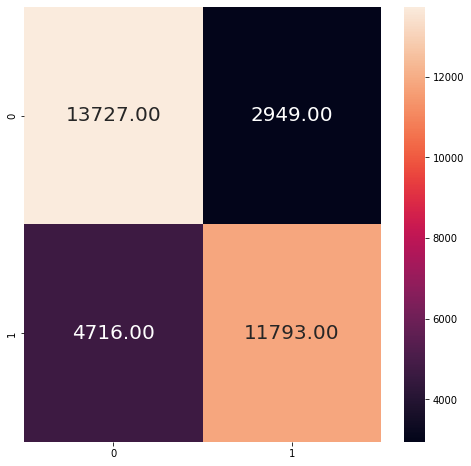

In [85]:
plt.figure(figsize=(8,8))
sns.heatmap(
    data=cm,
    annot= True,
    fmt = '.2f',
    annot_kws= {"fontsize" : 20}
)

In [86]:
# evaluating using confusion matrix
accuracy_score(y_test, y_pred)

0.7690221485610969

In [87]:
# evaluating using f1 score
f1_score(y_test, y_pred, pos_label=1)

0.7547278487088412

In [88]:
# evaluating using classiication report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.82      0.78     16676
         1.0       0.80      0.71      0.75     16509

    accuracy                           0.77     33185
   macro avg       0.77      0.77      0.77     33185
weighted avg       0.77      0.77      0.77     33185

